##### from __future__ import division
import pandas as pd
#from pandas.stats.api import ols
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
#import statsmodels.formula.api as sm
%matplotlib inline

In [15]:
df =pd.read_csv("/Users/davidstupski/Desktop/met_evap_error/Roberts_1999_csv.csv")

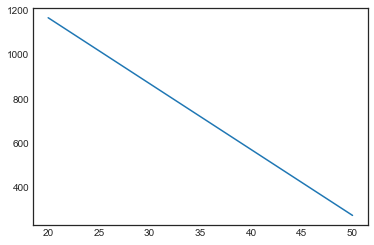

In [52]:
beta2 = -29.84
beta3 = 1763.06
pred_vector = np.linspace(18, 50, 100)
predictions = beta2*pred_vector + beta3
plt.plot(pred_vector, predictions)

In [49]:
metabolic = df[df["Data Type"]=="Metabolic"]
metabolic["Predictions"] = metabolic["Tb mean"].apply(lambda x: -29.84*x +1763.06)
metabolic["Residuals"] = (metabolic["Translated Y"]-metabolic["Predictions"])
metabolic["Resid Squared"] = metabolic["Residuals"].apply(lambda x: x**2)
sums = metabolic["Resid Squared"].sum()
#print sums
std = (sums/(len(metabolic)-2))**.5
##STD here is quantitatively equivalent to the Standard Error of the Prediction
print std
sem_residuals = std/(len(metabolic)**.5)
#print metabolic["Residuals"]
#print sem_residuals

58.66823199190959


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [18]:
evap = df[df["Data Type"] == "Evaporative"] 

In [47]:
evap["Log Evap"] = evap["Translated Y"].apply(lambda x: np.log(x))
evap_predictions = .0022*2.71828**(pred_vector*.2441)
#plt.plot(pred_vector, evap_predictions)
#plt.scatter(evap["Tb mean"], evap["Translated Y"])
evap["Predictions"] = evap["Tb mean"].apply(lambda x: .0022*2.71828**(.2441*x))
evap["Residuals"] = (evap["Translated Y"]- evap["Predictions"])
#print evap["Residuals"]
#plt.scatter(evap["Tb mean"], evap["Residuals"])
evap["Residuals Squared"]= evap["Residuals"].apply(lambda x: x**2)
sums_evap = evap["Residuals Squared"].sum()
se_evap_pred = (sums_evap/(len(evap)-2))**.5
print se_evap_pred

27.02048547789914


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

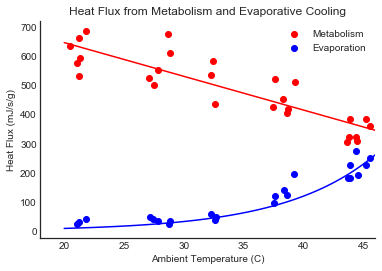

In [57]:
plt.style.use("seaborn-white")
fig, ax = plt.subplots()
ax.scatter(metabolic["Translated X"], metabolic["Translated Y"], color = "red", label = "Metabolism")
ax.scatter(evap["Translated X"], evap["Translated Y"], color = "blue", label = "Evaporation")
met_fit = pred_vector * -11.576 + 878.36
evap_fit = 3.0805*2.71828**(.0947*pred_vector)
ax.plot(pred_vector, met_fit, color = "red")
ax.plot(pred_vector, evap_predictions, color = "blue")
ax.set_xlim(18, 46)
ax.legend()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Heat Flux from Metabolism and Evaporative Cooling")
ax.set_ylabel("Heat Flux (mJ/s/g)")
ax.set_xlabel("Ambient Temperature (C)")
plt.savefig("/Users/davidstupski/Desktop/Met_fig_white.pdf")